In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import multiprocessing as mp
import os
import cv2
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_filter
from scipy import ndimage
from scipy import misc
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = ""
FileList = os.listdir("/content/drive/MyDrive/BancoImagenes/Final/0")
FileList1 = os.listdir("/content/drive/MyDrive/BancoImagenes/Final/1")

In [4]:
print(FileList1)

['9043_idx5_x2701_y601_class1.png', '9043_idx5_x2701_y801_class1.png', '9043_idx5_x2701_y751_class1.png', '9043_idx5_x2701_y651_class1.png', '9043_idx5_x2751_y401_class1.png', '9043_idx5_x2751_y651_class1.png', '9043_idx5_x2751_y601_class1.png', '9043_idx5_x2751_y501_class1.png', '9043_idx5_x2751_y451_class1.png', '9043_idx5_x2701_y1301_class1.png', '9043_idx5_x2701_y1251_class1.png', '9043_idx5_x2751_y701_class1.png', '9043_idx5_x2701_y1201_class1.png', '9043_idx5_x2751_y751_class1.png', '9043_idx5_x2751_y551_class1.png', '9043_idx5_x2701_y1151_class1.png', '9043_idx5_x2751_y1201_class1.png', '9043_idx5_x2751_y1151_class1.png', '9043_idx5_x2751_y951_class1.png', '9043_idx5_x2751_y851_class1.png', '9043_idx5_x2751_y901_class1.png', '9043_idx5_x2751_y1101_class1.png', '9043_idx5_x2751_y1001_class1.png', '9043_idx5_x2751_y801_class1.png', '9043_idx5_x2751_y1301_class1.png', '9043_idx5_x2751_y1051_class1.png', '9043_idx5_x2751_y1251_class1.png', '9043_idx5_x2801_y551_class1.png', '9043_id

In [5]:
len(FileList)

7421

In [6]:
len(FileList1)

5667

In [7]:
ListImg=[]
LiH=[]
LiG=[]
Dir= "/content/drive/MyDrive/BancoImagenes/Final/0/"
for nameImg in FileList:
    Img = cv2.imread(Dir+nameImg)
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    ImgH = cv2.cvtColor(Img, cv2.COLOR_RGB2HSV)
    ImgG=ndimage.gaussian_filter(Img, 0,1)
    ListImg.append(Img)
    LiH.append(ImgH)
    LiG.append(ImgG)

In [8]:
len(LiG)

7421

In [9]:
ListImg1=[]
LiH1=[]
LiG1=[]
Dir= "/content/drive/MyDrive/BancoImagenes/Final/1/"
for nameImg in FileList1:
    Img1 = cv2.imread(Dir+nameImg)
    Img1 = cv2.cvtColor(Img1, cv2.COLOR_BGR2RGB)
    ImgH1 = cv2.cvtColor(Img1, cv2.COLOR_RGB2HSV)
    ImgG1=ndimage.gaussian_filter(Img1, 0.5, 0)
    ListImg1.append(Img1)
    LiH1.append(ImgH1)
    LiG1.append(ImgG1)

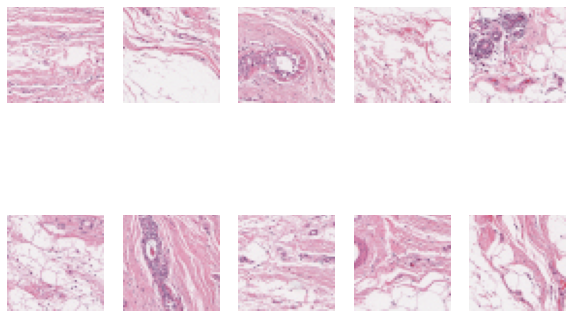

In [10]:
from google.colab.patches import cv2_imshow
rows = 2
columns = 5
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  
  plt.imshow(ListImg[n]) 
  plt.axis('off') 

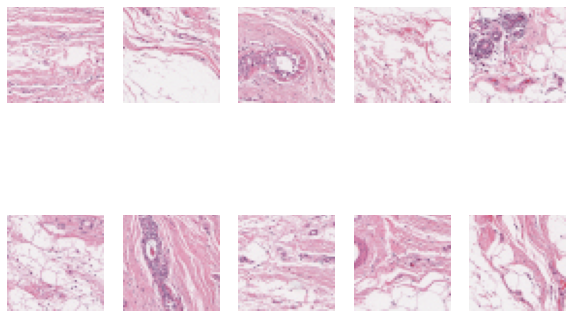

In [11]:
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  
  plt.imshow(LiG[n],cmap='gray') 
  plt.axis('off') 

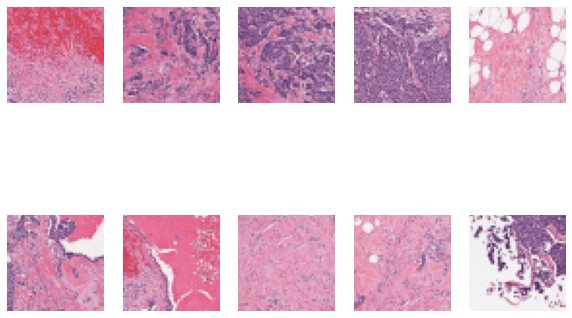

In [12]:
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  plt.imshow(ListImg1[n]) 
  plt.axis('off') 

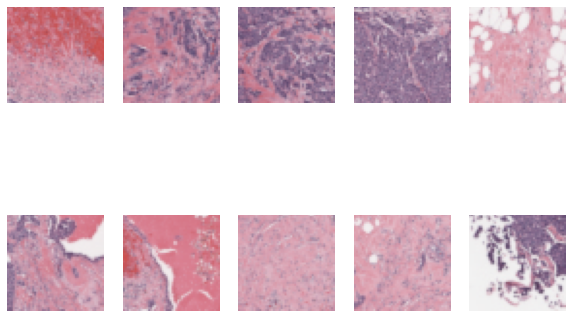

In [13]:
fig = plt.figure(figsize=(10, 7))
for n in range(10):
  fig.add_subplot(rows, columns, n+1) 
  plt.imshow(LiG1[n]) 
  plt.axis('off') 

In [14]:
light_purple = (60, 35, 140)
dark_purple = (180,255,255)

In [23]:
mask=[]
result=[]
for n in range(7421):
  mask1= cv2.inRange(LiH[n], light_purple, dark_purple)
  mask.append(mask1)

for n in range(7421):
  result1=cv2.bitwise_and(ListImg[n], ListImg[n], mask=mask[n])
  result1=cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
  result.append(result1)

In [16]:
maskc=[]
resultc=[]
for n in range(5667):
  mask2= cv2.inRange(LiH1[n], light_purple, dark_purple)
  maskc.append(mask2)

for n in range(5667):
  result2=cv2.bitwise_and(ListImg1[n], ListImg1[n], mask=maskc[n])
  result2=cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
  resultc.append(result2)

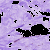

In [22]:
cv2_imshow(result[5666])

In [26]:
dst = cv2.addWeighted(result[1], 0.7, LiG[1], 0.5, 0)

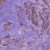

In [28]:
cv2_imshow(LiG1[1])

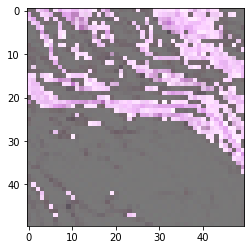

In [27]:
plt.imshow(dst)

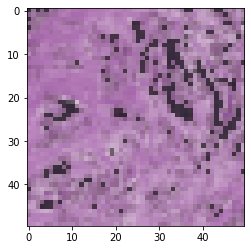

In [29]:
dst1 = cv2.addWeighted(resultc[1], 0.5, LiG1[1], 0.5, 0)
plt.imshow(dst1)

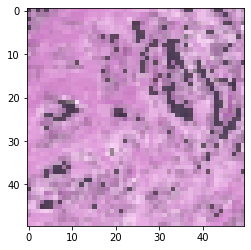

In [ ]:
dst2 = cv2.addWeighted(resultc[1], 0.5, LiG1[1], 0.7, 0)
plt.imshow(dst2)

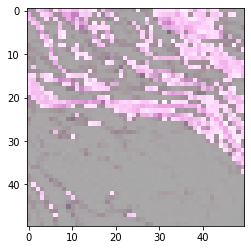

In [ ]:
dst3 = cv2.addWeighted(result[1], 0.5, LiG[1], 0.7, 0)
plt.imshow(dst3)

In [ ]:
dst4 = cv2.addWeighted(result[1], 0.5, LiG[1], 0.5, 0)

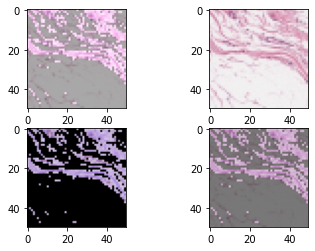

In [ ]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(dst3)
axarr[0,1].imshow(LiG[1])
axarr[1,0].imshow(result[1])
axarr[1,1].imshow(dst4)

In [30]:
BG01=[]
for n in range (7421): 
  dst=cv2.addWeighted(result[n], 0.5, LiG[n], 0.7, 0)
  BG01.append(dst)
BG02=[]
for n in range (7421): 
  dst=cv2.addWeighted(result[n], 0.5, LiG[n], 0.5, 0)
  BG02.append(dst)
BG03=[]
for n in range (7421): 
  dst=cv2.addWeighted(result[n], 0.7, LiG[n], 0.5, 0)
  BG03.append(dst)

In [31]:
BG11=[]
for n in range (5667): 
  dst=cv2.addWeighted(resultc[n], 0.5, LiG1[n], 0.7, 0)
  BG11.append(dst)
BG12=[]
for n in range (5667): 
  dst=cv2.addWeighted(resultc[n], 0.5, LiG1[n], 0.5, 0)
  BG12.append(dst)
BG13=[]
for n in range (5667): 
  dst=cv2.addWeighted(resultc[n], 0.7, LiG1[n], 0.5, 0)
  BG13.append(dst)

In [32]:
path="/content/drive/MyDrive/BC/BG01-11/01"
if not os.path.exists(path):
  os.makedirs(path)

cv2.imwrite(path + "/image" + str(1) +"0.png",BG01[1])

True

In [33]:
path="/content/drive/MyDrive/BancoImagenes/BG01-11/01"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (7421):
  cv2.imwrite(path + "/image" + str(n) +"0.png",BG01[n])

In [34]:
path="/content/drive/MyDrive/BancoImagenes/BG02-12/02"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (7421):
  cv2.imwrite(path + "/image" + str(n) +"0.png",BG02[n])

In [35]:
path="/content/drive/MyDrive/BancoImagenes/BG03-13/03"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (7421):
  cv2.imwrite(path + "/image" + str(n) +"0.png",BG03[n])

In [36]:
path="/content/drive/MyDrive/BancoImagenes/BG01-11/11"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (5667):
  cv2.imwrite(path + "/image" + str(n) +"1.png",BG11[n])

In [37]:
path="/content/drive/MyDrive/BancoImagenes/BG02-12/12"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (5667):
  cv2.imwrite(path + "/image" + str(n) +"1.png",BG12[n])

In [38]:
path="/content/drive/MyDrive/BancoImagenes/BG03-13/13"
if not os.path.exists(path):
  os.makedirs(path)

for n in range (5667):
  cv2.imwrite(path + "/image" + str(n) +"1.png",BG13[n])